In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1.a
Comme W est un mouvement brownien, les accroissements
$(W_{t_i^n} - W_{t_{i-1}^n})$ forment une famille iid de loi $  \sim \sqrt{t_i^n - t_{i-1}^n}$ * $\mathcal{N}(0,1)$ 

Or, $t_i^n - t_{i-1}^n$ = $\Delta T$

D'où $W_{t_i^n} = W_{t_{i-1}^n} + \sqrt{\Delta T}*Z_i $ où $Z_i \sim \mathcal{N}(0,1)$

## 1.b

In [2]:
def forward_MB(n):
    const = np.sqrt(1/(2**n))
    W = [0 for _ in range(2**n + 1)] 
    for i in range(1, 2**n + 1):
        W[i] = W[i-1] + np.random.normal()*const
        
    return W    

In [3]:
def draw_sample(n):
    W = [forward_MB(n) for k in range(1000)]
    return W

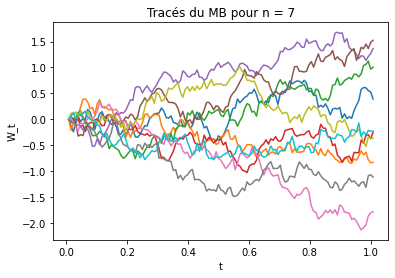

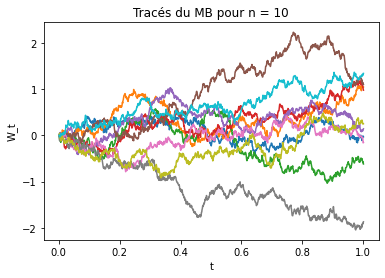

In [4]:
for n in [7,10]:    
    fig = plt.figure()

    for _ in range(10):    

        plt.plot(np.arange(1, 2**n + 2)/2**n, forward_MB(n))
        
    plt.title('Tracés du MB pour n = '+str(n))
    plt.xlabel('t')
    plt.ylabel('W_t')
    plt.show()

### 1.C

In [5]:
for n in range(1, 11):
    W = draw_sample(n)
    w_final = [temp[-1] for temp in W]
    w_med = [temp[2**(n-1)] for temp in W]
    
    cov = np.dot(w_final, w_med)/len(w_final) - np.mean(w_final)*np.mean(w_med)
    print("for n =", n)
    print("sample mean of WT :", np.mean(w_final))
    print("sample variance of WT :", np.var(w_final))
    print("sample covariance of final and mid values :",cov )
    print("")

for n = 1
sample mean of WT : 0.0029547202375187214
sample variance of WT : 1.0165889315149734
sample covariance of final and mid values : 0.5231256324090728

for n = 2
sample mean of WT : -0.0069308097753096355
sample variance of WT : 1.0583697420326517
sample covariance of final and mid values : 0.521231451633623

for n = 3
sample mean of WT : 0.03640781569116601
sample variance of WT : 1.0269885732411366
sample covariance of final and mid values : 0.48743144209673556

for n = 4
sample mean of WT : -0.05380243853498534
sample variance of WT : 1.062097410753192
sample covariance of final and mid values : 0.5447275041167678

for n = 5
sample mean of WT : 0.02212001469369605
sample variance of WT : 1.0143699850274273
sample covariance of final and mid values : 0.4930542811671511

for n = 6
sample mean of WT : 0.010792623919136303
sample variance of WT : 1.0299620257194402
sample covariance of final and mid values : 0.5401154084551376

for n = 7
sample mean of WT : -0.004000575566242073


### Commentaires
$W_{T}$ suit une loi normale centrée réduite, donc les moyennes et variances empiriques
sont cohérentes, on s'attendait à trouver 0 et 1 respectivement.


Puis à partir de l'indépendance des accroissements d'un processus brownien, $\mathbb{E}[W_{T}|W_{T/2}]=\mathbb{E}[W_{T}-W_{T/2}+W_{T/2}|W_{T/2}]=W_{T/2}$, on obtient $Cov[W_{T},W_{T/2}]$ = 0.5 qui est bien la valeur obtenue.

### 2.a
Soit 0 < s < t


La densité conditionnelle de $W_{\frac{s+t}{2}}|W_s,W_t$ est donnée par :
\begin{eqnarray*}f_{W_{\frac{s+t}{2}}\Big|W_s,W_t}(y|x,z)&=&\frac{f_{W_s,W_{\frac{s+t}{2}},W_t}(x,y,z)}{f_{W_s,W_t}(x,z)} \\ &=& \frac{f_{W_t|W_s,W_{\frac{s+t}{2}}}(z|x,y)f_{W_{\frac{s+t}{2}}|W_{s}}(y|x)f_{W_s}(x)}{f_{W_t|W_s}(z|x)f_{W_s}(x)} \\ &=& \frac{f_{W_t|W_s,W_{\frac{s+t}{2}}}(z|x,y)f_{W_{\frac{s+t}{2}}|W_{s}}(y|x)}{f_{W_t|W_s}(z|x)}\end{eqnarray*}

$W_t|W_s,W_{\frac{s+t}{2}}\sim \mathcal{N}\left(W_{\frac{s+t}{2}},\frac{t-s}{2}\right)$

$W_{\frac{t+s}{2}}|W_s\sim \mathcal{N}\left(W_s,\frac{t-s}{2}\right)$

$W_t|W_s\sim \mathcal{N}\left(W_s,t-s\right)$

Après simplification on obtient : $f_{W_{\frac{s+t}{2}}\Big|W_s,W_t}(y|x,z)=\frac{1}{\sqrt{2\pi\left(\frac{t-s}{4}\right)}}\exp\left(-\frac{1}{2}\cdot\frac{\left(y-\frac{x+z}{2}\right)^{2}}{(t-s)/4}\right)$

Donc on a $W_{\frac{s+t}{2}}|W_s,W_t\sim \mathcal{N}\left(\frac{W_s+W_t}{2},\frac{t-s}{4}\right)$

$\mathbb{E}\left(W_{\frac{s+t}{2}}\Big|W_s,W_t\right)=\frac{W_s+W_t}{2}$

$\mathbb{V}\left(W_{\frac{s+t}{2}}\Big|W_s,W_t\right)=\frac{t-s}{4}$




### 2.b 
Comme le processus brownien est une processus de Markov la loi de $W_{\frac{s+t}{2}}|W_s,W_t, W_{u<s}, W_{v>t}$ est la même que
$W_{\frac{s+t}{2}}|W_s,W_t, W_{u<s}$ qui suit la même loi que $W_{\frac{s+t}{2}}|W_s,W_t$

Autrement dit, $W_{\frac{s+t}{2}}|W_s,W_t, W_{u<s}, W_{v>t} \sim \mathcal{N}\left(\frac{W_s+W_t}{2},\frac{t-s}{4}\right)$

### 2.c

In [6]:
def backward_MB(n):
                     
    W = [0 for _ in range(2**n + 1)]
    W[-1] = np.random.normal()
    
    s = 2**n
    while s!=0:
        s //= 2
        if s==0:
            break
        i = 1
        while i*s<= 2**n:
            if W[i*s]==0:
                W[i*s] = (W[(i+1)*s]+W[(i-1)*s])*0.5 + (np.sqrt(s*0.5/(2**n)) * np.random.normal())
            i += 1
    
    return W

### 2.d

In [7]:
a, b, c = [],[],[]
for n in range(1, 11): 
    
    W = [backward_MB(n) for _ in range(1000)]

    w_final = [temp[-1] for temp in W]
    w_med = [temp[2**(n-1)] for temp in W]
    
    cov = np.dot(w_final, w_med)/len(w_final) - np.mean(w_final)*np.mean(w_med)
    a.append(np.mean(w_final))
    b.append(np.var(w_final))
    c.append(cov)
    
    print("for n =", n)
    print("sample mean of WT :", np.mean(w_final))
    print("sample variance of WT :", np.var(w_final))
    print("sample covariance of final and mid values :",cov )
    print("")
    

for n = 1
sample mean of WT : 0.0041995129618161596
sample variance of WT : 1.016392598732805
sample covariance of final and mid values : 0.5335650135818621

for n = 2
sample mean of WT : 0.01012146033148862
sample variance of WT : 1.0390270528485666
sample covariance of final and mid values : 0.4970624019125808

for n = 3
sample mean of WT : -0.055775781046977925
sample variance of WT : 1.05934346120374
sample covariance of final and mid values : 0.53626750231514

for n = 4
sample mean of WT : 0.016670879331262406
sample variance of WT : 0.9957530977155563
sample covariance of final and mid values : 0.48884960911517633

for n = 5
sample mean of WT : -0.030260662880963823
sample variance of WT : 1.0146511895261028
sample covariance of final and mid values : 0.503772022353526

for n = 6
sample mean of WT : -0.012704091374694155
sample variance of WT : 0.9198977344968698
sample covariance of final and mid values : 0.4451939874192638

for n = 7
sample mean of WT : -0.0005637466195955518
s

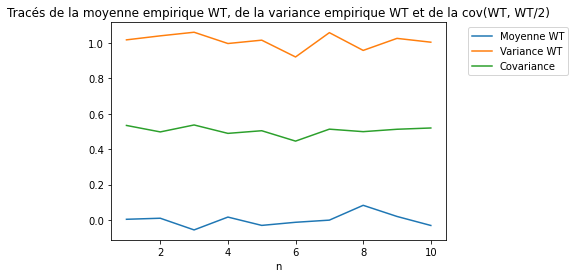

In [8]:
plt.plot(np.arange(1,11), a, label = 'Moyenne WT')
plt.plot(np.arange(1,11), b, label = 'Variance WT')
plt.plot(np.arange(1,11), c, label = 'Covariance')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Tracés de la moyenne empirique WT, de la variance empirique WT et de la cov(WT, WT/2)')
plt.xlabel('n')
plt.show()

## 3

In [9]:
def QV_backward(n):
    W = backward_MB(n)
    
    s = np.cumsum([(W[i] - W[i-1])**2 for i in range(1,len(W))])
    return s

In [10]:
def QV_forward(n):
    W = forward_MB(n)
    
    s = np.cumsum([(W[i] - W[i-1])**2 for i in range(1,len(W))])
    return s

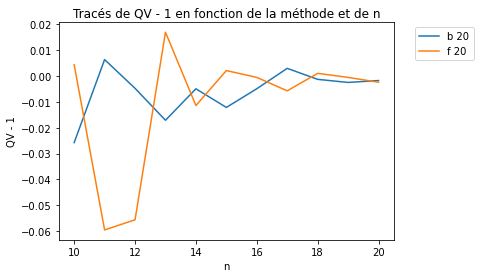

In [16]:
fig = plt.figure()
b = []
f = []

for n in range(10, 21):    
    b.append(QV_backward(n)[-1]-1)
    f.append(QV_forward(n)[-1]-1)
   
    
plt.plot(np.arange(10,21), b, label = "b "+str(n))
plt.plot(np.arange(10,21), f, label = "f "+str(n))

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Tracés de QV - 1 en fonction de la méthode et de n')
plt.xlabel('n')
plt.ylabel('QV - 1')
plt.show()

### Commentaires
On s'attendait bien à trouver des "droites" de pentes -1/2**n pour chaque n.